# Supervised Learning with scikit-learn

_Aprenda a crear y ajustar modelos predictivos y a evaluar qué tan bien funcionarán con datos invisibles._

<br>

---

***Descripción del curso*** 

---

El aprendizaje automático es el campo que enseña a las máquinas y las computadoras a aprender de los datos existentes para hacer predicciones sobre nuevos datos: ¿será un tumor benigno o maligno? ¿Cuáles de sus clientes llevarán su negocio a otra parte? ¿Es un correo electrónico no deseado en particular? 

En este curso, aprenderá a usar Python para realizar el aprendizaje supervisado, un componente esencial del aprendizaje automático. Aprenderá a crear modelos predictivos, ajustar sus parámetros y determinar qué tan bien se desempeñarán con datos invisibles, todo mientras utiliza conjuntos de datos del mundo real. Utilizará scikit-learn, una de las bibliotecas de aprendizaje automático más populares y fáciles de usar para Python.

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression

In [ ]:
boston = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/boston.csv')
# print(boston.head())
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/gm_2008_region.csv')
print(df.head())

   population  fertility  ...  child_mortality                      Region
0  34811059.0       2.73  ...             29.5  Middle East & North Africa
1  19842251.0       6.43  ...            192.0          Sub-Saharan Africa
2  40381860.0       2.24  ...             15.4                     America
3   2975029.0       1.40  ...             20.0       Europe & Central Asia
4  21370348.0       1.96  ...              5.2         East Asia & Pacific

[5 rows x 10 columns]


## 1. Classification
**_(Clasificación)_**

En este capítulo, se le presentará a los problemas de clasificación y aprenderá a resolverlos utilizando técnicas de aprendizaje supervisado. Y aplicará lo que aprenda a un conjunto de datos políticos, donde clasificará la afiliación partidaria de los congresistas de los Estados Unidos según sus registros de votación.


**Exploratory data analysis**

In [ ]:
iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [ ]:
print(iris.keys())
# DESCR :> Descripcion del conjunto de datos

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
iris.target_names
# 0 - setosa || 1 - versicolor || 2 - virginica

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Analisis exploratorio inicial <> EDA (Exploratory data analysis)**

In [ ]:
# Analisis exploratorio de datos <> EDA (Exploratory data analysis)
X = iris.data
y = iris.target

In [ ]:
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


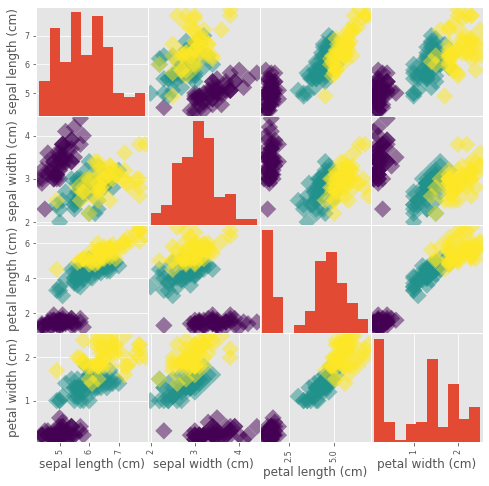

In [ ]:
# MATRIZ DE DISPERSIÓN
# C <> color
_= pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8],
                              s=150, marker = 'D')

In [ ]:
# plt.figure()
# sns.countplot(x='education', hue='party', data=df, palette='RdBu')
# plt.xticks([0,1], ['No', 'Yes'])
# plt.show()

**The classification challenge**

Todos los modelos de aprendizaje automatico en Sckit-learn se implementan como clases de python. Estas clases tienen 2 propositos:
*   Implementar los algoritmos para modelar y predecir
*   Almacenar toda la informacion que se aprende de los datos

(Fit) <> El entrenamiento de un modelo sobre los datos se denomina **_Ajustar el modeloo a los datos_**

(Predict) <> Predecir la etiqueta de un punto de dato sin etiquetar.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6) # Instanciar nuestro KNeighborsClassifier
knn.fit(iris['data'], iris['target']) # Ajustar a nuestro clasificar el conjunto de entrenamiento y datos etiquetados

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],
                  [5.7, 2.6, 3.8, 1.3],
                  [4.7, 3.2, 1.3, 0.2]])
# X_new.shape
prediction = knn.predict(X_new) # Usar el metodo de clasificador 
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier 
# y = df['party'].values
# X = df.drop('party', axis=1).values
# knn = KNeighborsClassifier(n_neighbors=6)
# knn.fit(X,y)
# y_pred = knn.predict(X)
# new_prediction = knn.predict(X_new)
# print("Prediction: {}".format(new_prediction))

**Measuring model performance**

In [ ]:
# MEDIR EL RENDIMIENTO -- METRICAS
# ACCURACY <> metrica de uso común
# ACCURACY = # de predicciones correctas / # de total de datos

In [ ]:
from sklearn.model_selection import train_test_split # Importar la division de prueba y test del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21,  #Semilla para el generador de # aleatorios
                                                    stratify=y) 
# stratify Distribuir los conjunto de prueba y test tal como estan en el conjunto de datos original
# Tener random_state nos permitira reproducir los mismos resultados

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# print(\"Test set predictions:\\n {}\".format(y_pred))


In [ ]:
# Comprobar la precission de nuestro modelo (ACCURACY)
knn.score(X_test, y_test)

0.9555555555555556

In [ ]:
# A medida que K aumenta, el limite de desicion se vuelve mas suave y menos curvo
# Modelo menos complejo cuando tiene menor K
# Generalmente los modelos complejos corren el riesgo de ser sensibles al ruido (Overfiting)

Una versión reducida del conjunto de datos MNIST es uno de los conjuntos de datos incluidos en scikit-learn.

Este conjunto de datos de reconocimiento de dígitos MNIST tiene 10 clases, ¡los dígitos del 0 al 9!.

Cada muestra de este conjunto de datos de scikit-learn es una imagen de 8x8 que representa un dígito escrito a mano. Cada píxel está representado por un número entero en el rango de 0 a 16, lo que indica niveles variables de negro. Recuerde que los conjuntos de datos integrados de scikit-learn son del tipo Bunch, que son objetos similares a diccionarios. De manera útil para el conjunto de datos MNIST, scikit-learn proporciona una clave de 'imágenes' además de las claves de 'datos' y 'objetivo' que ha visto con los datos de Iris. Debido a que es una matriz 2D de las imágenes correspondientes a cada muestra, esta clave de 'imágenes' es útil para visualizar las imágenes. Por otro lado, la clave 'datos' contiene la matriz de características, es decir, las imágenes como una matriz plana de 64 píxeles.

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)


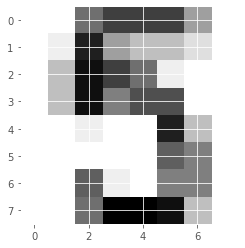

In [ ]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
# print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2 , random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


Increíblemente, este clasificador k-NN esta listo para usarse con 7 vecinos. Aprendió de los datos de entrenamiento y predijo las etiquetas de las imágenes en el conjunto de prueba con un 98% de precisión.

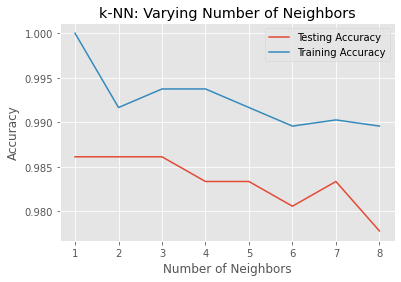

In [ ]:
# overfitting (sobreajustar) ||  underfitting (desajustar)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

¡Buen trabajo! Parece que la precisión de la prueba es mayor cuando se utilizan 3 y 5 vecinos. El uso de 8 vecinos o más parece dar como resultado un modelo simple que no se ajusta a los datos.

## 2. Regression
**_(Regresión)_**

En el capítulo anterior, usó conjuntos de datos políticos y de imágenes para predecir resultados binarios y multiclase. Pero, ¿y si su problema requiere un resultado continuo? La regresión es la más adecuada para resolver estos problemas. Aprenderá conceptos fundamentales en regresión y los aplicará para predecir la esperanza de vida en un país determinado utilizando los datos de Gapminder..


In [ ]:
# boston = pd.read_csv('boston.csv')
boston = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/boston.csv')
print(boston.head())


      CRIM    ZN  INDUS  CHAS     NX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [ ]:
# CRIM es la tasa de criminalidad per capita
# NX concentracion de oxidos nitricos
# RM # de habitaciones por vivienda
# MEDV -- VARIABLE OBJETIVO -- valor medio de las viviendas ocupadas en miles de dolares

In [ ]:
y = boston['MEDV'].values
X = boston.drop('MEDV', axis=1).values

In [ ]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# y
# X_rooms

In [ ]:
# Remodelando para que sea un matriz vertical 
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

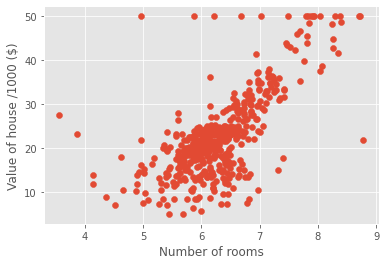

In [ ]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

In [ ]:
# Ajustar nuestro modelo de regresion
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Verificar las predicciones de los regresores sobre el rango de los datos
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1, 1)
# prediction_space

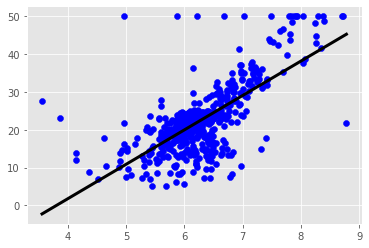

In [ ]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484925

'gapminder.csv'. Específicamente, su objetivo será utilizar estos datos para predecir la esperanza de vida en un país determinado en función de características como el PIB, la tasa de fertilidad y la población del país.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/gm_2008_region.csv')
print(df.head())

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of y and X before reshaping
print("Dimensions of y before reshaping: ", y.shape)
print("Dimensions of X before reshaping: ", X.shape)

# Reshape X and y
y_reshaped = y.reshape(-1, 1)
X_reshaped = X.reshape(-1, 1)

# Print the dimensions of y_reshaped and X_reshaped
print("Dimensions of y after reshaping: ", y_reshaped.shape)
print("Dimensions of X after reshaping: ", X_reshaped.shape)

   population  fertility  ...  child_mortality                      Region
0  34811059.0       2.73  ...             29.5  Middle East & North Africa
1  19842251.0       6.43  ...            192.0          Sub-Saharan Africa
2  40381860.0       2.24  ...             15.4                     America
3   2975029.0       1.40  ...             20.0       Europe & Central Asia
4  21370348.0       1.96  ...              5.2         East Asia & Pacific

[5 rows x 10 columns]
Dimensions of y before reshaping:  (139,)
Dimensions of X before reshaping:  (139,)
Dimensions of y after reshaping:  (139, 1)
Dimensions of X after reshaping:  (139, 1)


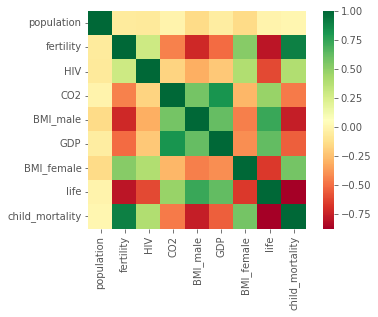

In [ ]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

# Celdas + verdes - Correlacion positiva
# Celdas + rojas  - Correlacion negativa

**The basics of linear regression**

In [ ]:
# Residuo es la diferencia entre el valor real y el valor predicho
# Funcion de perdida
# Minimos cuadrados ordinarios (OLS): Minimizar la suma de los cuadrados de los residuos


In [ ]:
# Metrica del rendimiento del modelo
# Metodo para la puntuacion para la regresion lineal se llama Rcuadrado
# Esta metrica cuantifica la cantidad de Varianza en la variable de destino 
# que predice a partir de las variable de caracteristicas

In [ ]:
X_fertility = df['fertility'].values
X_fertility = X_fertility.reshape(-1, 1)

0.6192442167740035


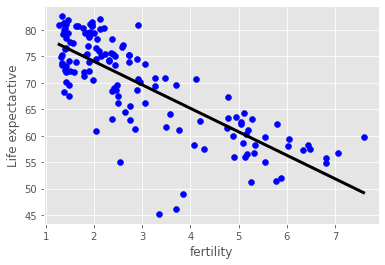

In [ ]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X, y, color='blue')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.ylabel('Life expectactive')
plt.xlabel('fertility')
plt.show()

Calculará el **error cuadrático medio de la raíz (RMSE)**, que es **otra métrica** de uso común para evaluar modelos de regresión

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/gm_2008_region.csv')
print(df.head())

y = df['life'].values
X = df.drop(['life','Region'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

   population  fertility  ...  child_mortality                      Region
0  34811059.0       2.73  ...             29.5  Middle East & North Africa
1  19842251.0       6.43  ...            192.0          Sub-Saharan Africa
2  40381860.0       2.24  ...             15.4                     America
3   2975029.0       1.40  ...             20.0       Europe & Central Asia
4  21370348.0       1.96  ...              5.2         East Asia & Pacific

[5 rows x 10 columns]
R^2: 0.838046873142936
Root Mean Squared Error: 3.2476010800377213


**Cross-validation**

In [ ]:
# VALIDACION CRUZADA
# Usar mas k folds es mas costoso computacionalmente ( adapta y predice mas veces)
# Este metodo evita el problema de que la metrica depeensa de la division de prueba y test

In [ ]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score 

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793232


In [ ]:
# Import necessary modules
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score 

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.8718712782622108
0.8436128620131201


In [ ]:
%timeit cross_val_score(reg,X,y,cv=3)

100 loops, best of 5: 4.87 ms per loop


In [ ]:
%timeit cross_val_score(reg,X,y,cv=10)

100 loops, best of 5: 15.8 ms per loop


**Regularized regression**

In [ ]:
# AJUSTE DE HIPERPARAMETROS

In [ ]:
# REGULARIZACION penalizar los coeficiientes muy grandes de la regresion lineal

# Regresion de Cresta :> Ridge regresión
# Se tiene un alpha que penaliza los coeficientes

# Regresion de lazo :> Lasso regresión
# Tiende a reducir los coeficientes de los features menos importantes para que sean 0
# Permite seleccionar las caracteristicas importantes de un conj de datos

In [ ]:
# normalize=True 
# Asegura que nuestran variables esten en la misma escala

In [ ]:
X

array([[3.4811059e+07, 2.7300000e+00, 1.0000000e-01, ..., 1.2314000e+04,
        1.2990490e+02, 2.9500000e+01],
       [1.9842251e+07, 6.4300000e+00, 2.0000000e+00, ..., 7.1030000e+03,
        1.3012470e+02, 1.9200000e+02],
       [4.0381860e+07, 2.2400000e+00, 5.0000000e-01, ..., 1.4646000e+04,
        1.1889150e+02, 1.5400000e+01],
       ...,
       [8.6589342e+07, 1.8600000e+00, 4.0000000e-01, ..., 4.0850000e+03,
        1.2193670e+02, 2.6200000e+01],
       [1.3114579e+07, 5.8800000e+00, 1.3600000e+01, ..., 3.0390000e+03,
        1.3244930e+02, 9.4900000e+01],
       [1.3495462e+07, 3.8500000e+00, 1.5100000e+01, ..., 1.2860000e+03,
        1.3197450e+02, 9.8300000e+01]])

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


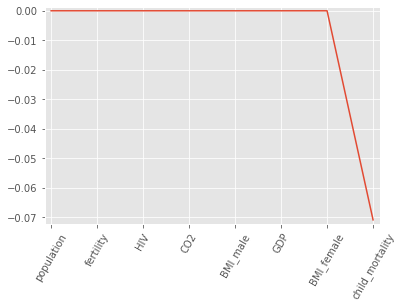

In [ ]:
# Import Lasso
from sklearn.linear_model import Lasso
names = df.drop(['life','Region'], axis=1).columns
lasso = Lasso(alpha=0.4,normalize=True)

lasso.fit(X, y)
lasso_coef = lasso.fit(X, y).coef_
print(lasso_coef)

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.margins(0.02)
plt.show()

**Lasso es ideal para la selección de características**, pero al crear modelos de regresión, la **regresión de Ridge debería ser su primera opción.**

Recuerde que Lasso realiza la regularización agregando a la función de pérdida un término de penalización del valor absoluto de cada coeficiente multiplicado por algún alfa. Esto también se conoce como regularización porque el término de regularización es la norma de los coeficientes. Sin embargo, esta no es la única forma de regularizar.

Si, en cambio, tomaras la suma de los valores al cuadrado de los coeficientes multiplicados por algún alfa, como en la regresión de Ridge, estarías calculando la norma

In [ ]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

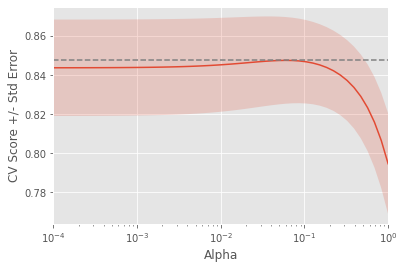

In [ ]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Observe cómo cambian las puntuaciones de validación cruzada con diferentes alfas. ¿Qué alfa deberías elegir? ¿Cómo puedes afinar tu modelo?

## 3. Fine-tuning your model
**_(Ajuste de su modelo)_**

Habiendo entrenado su modelo, su próxima tarea es evaluar su desempeño. En este capítulo, aprenderá sobre algunas de las otras métricas disponibles en scikit-learn que le permitirán evaluar el desempeño de su modelo de una manera más matizada. A continuación, aprenda a optimizar sus modelos de clasificación y regresión mediante el ajuste de hiperparámetros..


In [ ]:
# DESEQUILIBRIO DE CLASES
# MATRIZ DE CONFUSION
# VPP es la precision
# Recall es la sensibilidad
# F1 Score <> 2(precision*Recall)/precision + Recall

Conjunto de datos de PIMA Indians obtenido del Repositorio de aprendizaje automático de UCI.

El objetivo es predecir si una paciente determinada contraerá diabetes según características como el IMC, la edad y el número de embarazos. Por tanto, es un problema de clasificación binaria. Un valor objetivo de 0 indica que el paciente no tiene diabetes, mientras que un valor de 1 indica que el paciente tiene diabetes.



[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/diabetes.csv')
df.head(3)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
y = df['diabetes'].values
X = df.drop('diabetes', axis=1).values

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[176  30]
 [ 56  46]]
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



**LA REGRESION LOGISTICA**

Dada una caracteristica, log regresion generará una probabilidad p con respecto a la variable objetivo

*   p > 0.5 Etiqueta 1
*   p < 0.5 Etiqueta 0

Umbral es de 0.5


In [ ]:
# CURVA ROC (Curva caracteristica de funcionamiento del receptor)
# Variacion del umbral

In [ ]:
# FPR  : Tasa de falsos positivos
# TPR: Tasa de verdaderos positivos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# logreg = LogisticRegression()
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred)) # Matriz de confusión
print(classification_report(y_test, y_pred)) # Informes de clasificación

[[168  38]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



Los informes de clasificación y las matrices de confusión son excelentes métodos para evaluar cuantitativamente el rendimiento del modelo, mientras que las **CURVAS ROC** proporcionan una forma de evaluar visualmente los modelos.

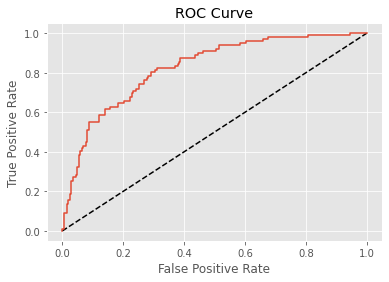

In [ ]:
# Import necessary modules
from sklearn.metrics import  roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

**Area under the ROC curve**

Mientras mayor sea el area bajo la curva mejor es nuestro modelo

In [ ]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X, y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8242908814011042
AUC scores computed using 5-fold cross-validation: [0.81222222 0.80777778 0.82574074 0.87283019 0.84490566]


**Hyperparameter tuning**

In [ ]:
# Los parametros que se deben de especificar antes de ajustar se llaman Hiperparametros
# Estos parametros no se pueden aprender explicitamentre ajustando el modelo

*Grid search cross validation*

In [ ]:
# Busqueda de cuadricula es el GridSearchCV

In [ ]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
# logreg = LogisticRegression()
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.7734742381801205


Parece que una 'C' de 0.006 da como resultado el mejor rendimiento.

In [ ]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 1}
Best score is 0.7409133350309821


Tenga en cuenta que RandomizedSearchCV nunca superará a GridSearchCV. En cambio, es valioso porque ahorra tiempo de cálculo

**Hold-out set for final evaluation**

**Hold-out set in practice I: Classification**

In [ ]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

Tuned Logistic Regression Parameter: {'C': 0.0007196856730011522, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7630434782608695


¿Recuerda la regresión de lazo y cresta del capítulo anterior? Lasso usó la penalización para regularizar, mientras que Ridge usó la penalización. Existe otro tipo de regresión regularizada conocida como red elástica. En la regularización neta elástica, el término de penalización es una combinación lineal de las penalizaciones

**Hold-out set in practice II: Regression**

In [ ]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test,y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.73301859157132, tolerance: 0.008436684782608695
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.920050137052527, tolerance: 0.008285869565217392
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.696178648704294, tolerance: 0.008673913043478266
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.24765337510702715
Tuned ElasticNet MSE: 0.16664179543611007


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.87629751791528, tolerance: 0.01060956521739131
  positive)


## 4. Preprocessing and pipelines
**_Preprocesamiento y canalizaciones_**

Este capítulo presenta las canalizaciones y cómo scikit-learn permite encadenar transformadores y estimadores y utilizarlos como una sola unidad. Se introducirán técnicas de preprocesamiento como una forma de mejorar el rendimiento del modelo, y las canalizaciones unirán conceptos de capítulos anteriores.


**Preprocessing data**

In [ ]:
# DUMMY VARIABLES ES PARA SEPARAR VARIABLES CATEGORICAS
# FEATURE SEXO : Femenino | Masculino
# 2 Features se crearan de sexo_fem and sexo_masc
# Sckit-learn: OneHotEncoder
# Pandas: get_dummies()

In [ ]:
# Gapminder dataset 
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/gm_2008_region.csv')
df.head(3)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


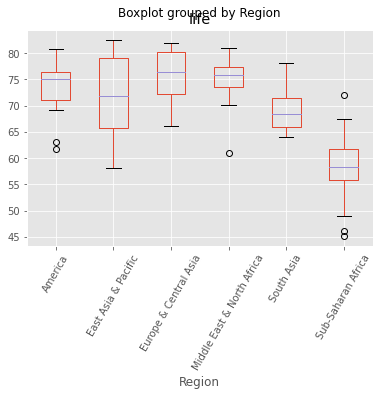

In [ ]:
# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

In [ ]:
# Las variables categorica hay que binarizarlo creando variables ficticias

# Create dummy variables: df_region
df_region = pd.get_dummies(df)

print(df_region.columns)

df_region = pd.get_dummies(df,
                           drop_first=True) 
# drop_first <> para eliminar la variable ficticia innecesaria

print(df_region.columns)


Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=0.5,normalize=True)
ridge_cv = cross_val_score(ridge,X,y,cv=5)

print(ridge_cv)

[0.26648172 0.23084647 0.27355543 0.24898795 0.25673452]


**Handling missing data**

**PREPROCESAMIENTO DE DATOS**

In [ ]:
# Axis = 0   <> imputaremos en las columnas
# .fit() # Ajustando este imputador a nuestros datos
# .transform()  #Transformar nuestros datos usando el metodo de transformacion

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/house-votes-84.csv', 
                 sep=";")
df.head()

,part1,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republica0,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republica0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [ ]:
# Eliminando datos faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   part1              435 non-null    object
 1   infants            435 non-null    object
 2   water              435 non-null    object
 3   budget             435 non-null    object
 4   physician          435 non-null    object
 5   salvador           435 non-null    object
 6   religious          435 non-null    object
 7   satellite          435 non-null    object
 8   aid                435 non-null    object
 9   missile            435 non-null    object
 10  immigration        435 non-null    object
 11  synfuels           435 non-null    object
 12  education          435 non-null    object
 13  superfund          435 non-null    object
 14  crime              435 non-null    object
 15  duty_free_exports  435 non-null    object
 16  eaa_rsa            435 non-null    object
dt

In [ ]:
df[df == '?'] = np.nan
print(df.isnull().sum())
print("Shape of Original DataFrame: {}".format(df.shape))

part1                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)


In [ ]:
df = df.dropna()
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


In [ ]:
# from sklearn.preprocessing import Imputer # en desuso 
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')
clf = SVC()

# Configure el pipeline  con los pasos requeridos
steps = [('imputation', imp),
        ('SVM', clf)]

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/house-votes-84.csv', 
                 sep=";")
df.head(3)
df[df == '?'] = np.nan
df.head(3)

y = df['part1']
X = df.drop('part1', axis=1)

In [ ]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# imp.fit(X)
# X = imp.transform(X)
# X

array([['0', '1', '0', ..., '1', '0', '1'],
       ['0', '1', '0', ..., '1', '0', '1'],
       ['0', '1', '1', ..., '1', '0', '0'],
       ...,
       ['0', '1', '0', ..., '1', '0', '1'],
       ['0', '0', '0', ..., '1', '0', '1'],
       ['0', '1', '0', ..., '1', '0', '0']], dtype=object)

In [ ]:
# Import necessary modules
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# missing_values='NaN'
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
steps = [('imputation', imp),
        ('SVM', SVC())]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)

# Compute metrics
print(pipeline.score(X_test,y_test))
print(classification_report(y_test, y_pred))

0.9618320610687023
              precision    recall  f1-score   support

    democrat       0.98      0.96      0.97        85
  republica0       0.94      0.96      0.95        46

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131



**CENTRAR Y ESCALAR DATOS**

In [ ]:
# Normalizar || Escalar || centrar
# Dada cualquier columna puede restar la media y dividir entre la varianza
# Estandarizacion: Todas las caracteristicas se centren en 0 y su varianza sea 1
# Normalizar para que los datos esten entre 0 y 1

[dataset - White Wine Quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

In [ ]:
# Calidad del vino blanco
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/white-wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df['target'] = [ True if i < 5 else False for i in df['quality'] ]
df['target'] 

0       False
1       False
2       False
3       False
4       False
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Name: target, Length: 4898, dtype: bool

In [ ]:
y = df['target']
X = df.drop(['target','quality'], axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: fixed acidity             6.854788
volatile acidity          0.278241
citric acid               0.334192
residual sugar            6.391415
chlorides                 0.045772
free sulfur dioxide      35.308085
total sulfur dioxide    138.360657
density                   0.994027
pH                        3.188267
sulphates                 0.489847
alcohol                  10.514267
dtype: float64
Standard Deviation of Unscaled Features: fixed acidity            0.843782
volatile acidity         0.100784
citric acid              0.121007
residual sugar           5.071540
chlorides                0.021846
free sulfur dioxide     17.005401
total sulfur dioxide    42.493726
density                  0.002991
pH                       0.150985
sulphates                0.114114
alcohol                  1.230495
dtype: float64
Mean of Scaled Features: 2.7314972981668206e-15
Standard Deviation of Scaled Features: 0.9999999999999999


In [ ]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))


Accuracy with Scaling: 0.964625850340136
Accuracy without Scaling: 0.9666666666666667


#### CLASIFICACION ALL 

In [ ]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space # step_name__parameter_name
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.9693877551020408
              precision    recall  f1-score   support

       False       0.97      1.00      0.98       951
        True       0.43      0.10      0.17        29

    accuracy                           0.97       980
   macro avg       0.70      0.55      0.58       980
weighted avg       0.96      0.97      0.96       980

Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


#### REGRESION ALL 

In [ ]:
# Gapminder dataset 
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/data-scientist-with-python-datacamp/main/1.%20Courses/24.%20Supervised%20Learning%20with%20scikit-learn/dataset/gm_2008_region.csv')
df.head(3)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America


In [ ]:
y = df['life']
X = df.drop(['life','Region'], axis=1)

In [ ]:
steps = [('imputation', SimpleImputer(missing_values='NaN', strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline,param_grid=parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
